# Exame

1. A relação entre o algoritimo de relaxação e os de Jacobi e Gauss-Seidel é que eles são metodos interativos, ou seja a partir de uma resposta aproximada ele vai interando até encontrar  uma resposta que converge com o a euação ou sistema dado. A condição de convergencia dos dois  métodos, Jacobi e Gauss-Seidel, é a mesma, é necessário que a matriz seja de diagonal dominante, ou seja, o módulo da matriz na diagonal é maior que a soma dos módulos de todos os valores fora da diagonal, sendo essa uma condição suficiente mas não necessária. Para a relaxação uma condição suficiente de convergencia é o módulo da derivada no ponto ser menor que 1.

# Exercício 2

#### 2.1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

R = 1
L = 1
c = 1
class circ:
    def __init__(self,n):
        self.n = n
        self.matrix = np.zeros([n+1,n+1],complex) 
        for i in range(0, n +1):
            for k in range(0,n + 1):
                if i == k:
                    self.matrix[i,k] = (1/(1j * w * c)) + (2*R + 1j*w*L)
                    if i >= 1:
                        self.matrix[i,k-1] = -R
        self.matrix[0,0] -= R
        # Arrumar a ultima coluna depois
        for p in range(n+1):
            self.matrix[p,n] = -1j*w*L

# decomposição LU
def LU(A):
    A = np.copy(A)
    U = A
    N = U[:,0]
    N = len(N)
    L = np.zeros([N,N],complex)
    for m in range(N):
        for p in range(N):
            if p >= m:    
                L[p,m] = U[p,m]
        # Divide by the diagonal element
        div = U[m,m]
        U[m,:] /= div

        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = U[i,m]
            U[i,:] -= mult*U[m,:]

    
    return L , U


# solução LU
def solucao_LU(L,U,v):
    L = np.copy(L)
    U = np.copy(U)
    N = len(v)
    y = np.empty(N,complex)
    for n in range(N):
        y[n] = v[n]/L[n,n]
        for j in range(n):
            y[n] -= L[n,j]*y[j]/L[n,n]
        # Backsubstitution
    x = np.empty(N,complex)
    for m in range(N-1,-1,-1):
        x[m] = y[m]
        for i in range(m+1,N):
            x[m] -= U[m,i]*x[i]
    return x


# vou considerar w nessas unidade = 1
# e V(w) = 1 também
w = 1
n = 5
matriz = circ(n)
L,U = LU(matriz.matrix)
v = np.zeros(n + 1)
v[0] = 1
I = solucao_LU(L,U,v)
print(I)

[0.96875+0.j      0.46875+0.j      0.21875+0.j      0.09375+0.j
 0.03125+0.j      0.     +0.03125j]


#### 2.2

Os coeficientes referentes ás frequências que eu medi não variam com a quantidade de pontos, mas, colocando mais pontos eu tenho uma resolução melhor da freqências, ou seja , eu consigo diferenciar mais frequencias, com poucos pontos frequências diferentes mas próximas parecem ás mesmas, mas , com mais pontos nota-se a diferençã. O conjunto de pontos mais adequados são as de bases 2, pois, como pode ser visto no meu códifo de fft, este algotírimo que é muito mais rápido que uma dft é muito mais eficiente com um conjunto de pontos na base dois. Com o python ,np.fft.fft, ele consegue com número de pontos diferentes, mas é menos eficiente, no caso do meu ele só funciona com conjutos de pontos da base 2.

In [8]:
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    elif N % 2 != 0:
        raise ValueError("escolher x como potencia de 2")


    X_even = fft(x[::2])

    X_odd = fft(x[1::2])

    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    X = np.zeros(N, dtype=complex)
    half_N = N // 2
    X[:half_N] = X_even + factor[:half_N] * X_odd
    X[half_N:] = X_even + factor[half_N:] * X_odd

    return X





def V(t):
    V_0 = 1
    T = 64
    Omega = 3
    return V_0*np.exp(-((t - (T/2))**2)/2)*np.cos(Omega*t)

N = 2048
t = np.linspace(0,64,N)
x = V(t)
c = np.abs(fft(x))
print(c)

[0.16069874 0.30927276 0.56696353 ... 0.86874502 0.56696353 0.30927276]


4096

### 2.3

Percebe-se que a medida em que os numeros de pontos vão aumentando os valores vão convergindo para 0 e um a direite, então , percebe-se que uma freqências 0 não faz sentido o que mostra que nececcita-se de um certo número de pontos para observar isso. É possível notar tambem que os primeiros coeficiente convergem num rítimo menor que os ultimos , é possívelver isso observando as diferenca entres os calculado e os de referência 

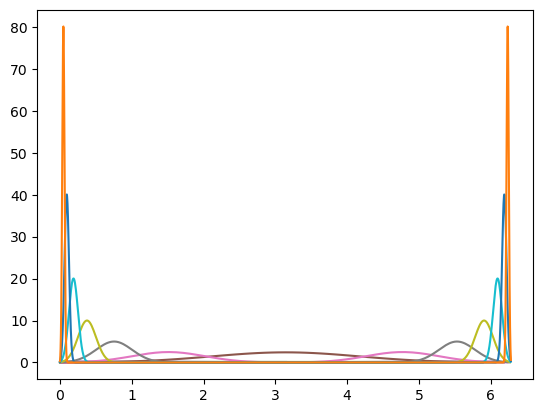

In [11]:
N = 2**15
t = np.linspace(0,64,N)
x = V(t)
ref_c = np.abs(np.fft.fft(x))




for N in [2,4,8,16,32,64,128,256,512,1024,2048,4096]:
    t = np.linspace(0,64,N)
    x = V(t)
    c = np.abs(np.fft.fft(x))

    
    frequencias = np.arange(N)*(2*np.pi/N)
    plt.plot(frequencias,c,label = f'N = {N}')
    



In [12]:
for N in [2,4,8,16,32,64,128,256,512,1024,2048,4096,2**13,2**14,2**15]:
    t = np.linspace(0,64,N)
    x = V(t)
    c = np.abs(np.fft.fft(x))
    print('A diferença entre os coeficientes de N = 'f'{N} é : \n')
    print(c - ref_c[:N])

A diferença entre os coeficientes de N = 2 é : 

[-2.57235737 -4.95231754]
A diferença entre os coeficientes de N = 4 é : 

[ -2.57235737  -4.95231754  -9.07967971 -13.91343036]
A diferença entre os coeficientes de N = 8 é : 

[ -2.57235308  -4.95229725  -9.07964283 -13.9133823  -19.54917474
 -26.20531245 -34.12713797 -43.56838879]
A diferença entre os coeficientes de N = 16 é : 

[  -2.53553525   -4.91591175   -9.04448649  -13.88013426  -19.51831777
  -26.17703919  -34.10124874  -43.54421516  -54.75900117  -67.99069755
  -83.46725256 -101.38835637 -121.91269663 -145.14424109 -171.11825326
 -199.78786706]
A diferença entre os coeficientes de N = 32 é : 

[  -2.35779656   -4.73882686   -8.86937943  -13.70838144  -19.3513936
  -26.01657687  -33.94911315  -43.40255325  -54.63017697  -67.87701804
  -83.37056649 -101.30975041 -121.85235026 -145.10129285 -171.09047801
 -199.77102382 -230.99946962 -264.53023217 -300.01162274 -336.98321336
 -374.87847813 -413.03493447 -450.71067659 -487.106474

#### 3.1

Primeiro vou escrever v = dr/dt, e separar tudo em coordenada x e y, o esperado seria observar uma dependencia com h^4, mas , não soube como mostra-la.

In [15]:
# Método Runge-Kutta de quarta ordem
def rk4_4d(a, b, N, r0, f):
    h = (b - a) / N
    t = np.linspace(a, b, N)
    r = np.zeros((4, N))
    r[:, 0] = r0
    
    for i in range(1, N):

        k1 = h * f(r[:, i-1], t[i-1])
        k2 = h * f(r[:, i-1] + 0.5 * k1, t[i-1] + 0.5 * h)
        k3 = h * f(r[:, i-1] + 0.5 * k2, t[i-1] + 0.5 * h)
        k4 = h * f(r[:, i-1] + k3, t[i-1] + h)
        
        r[:, i] = r[:, i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return r



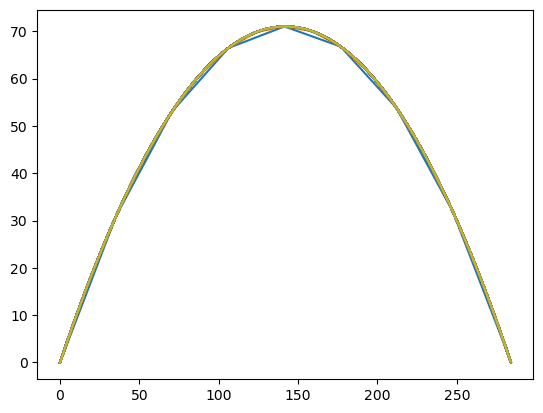

In [53]:
import numpy as np
import matplotlib.pyplot as plt


def f(r,t):
    g = 9.8
    const = 0.4
    rx,vx,ry,vy = r
    frx = vx
    fvx = 0  
    fry = vy
    fvy = -g +np.exp((10**(-6))*ry)
    return np.array([frx,fvx,fry,fvy],float)



a = 0
b_f = 10
N = np.arange(10,1000,10)

for n in N:
    t = np.linspace(0,b_f,n)

    v0 = 50

    r_0 = (0,v0*np.cos(np.pi/4),0,v0*np.sin(np.pi/4))

    r = rk4_4d(a,b_f,n,r_0,f)
    x = r[0]
    y = r[2]


    # Parar a simulação quando o corpo atingir o solo 
    mask = (y >= 0) 
    x = x[mask]
    y = y[mask]
    plt.plot(x,y)


### 3.2

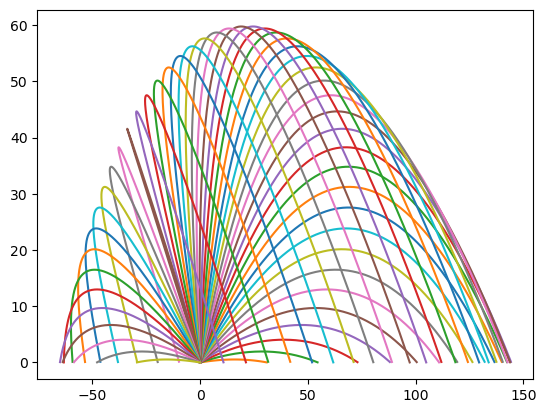

In [51]:
def Veloar(ry):
    if ry <= 0:
        return 0
    else:
        return 10 * (ry / 0.5) ** (1 / 7)

# o [V - V_ar] fica em x = [Vx - |V_ar|] em y [Vy]
def f(r, t):
    g = 9.82
    const = 0.4
    rx, vx, ry, vy = r
    v_ar = Veloar(ry)
    v_arrast_x = vx - v_ar
    v_arrast_y = vy
    frx = vx
    fvx = - const * np.abs(v_arrast_x) * v_arrast_x
    fry = vy
    fvy = -g  - const * np.abs(v_arrast_y) * v_arrast_y
    r_novo = np.array([frx, fvx, fry, fvy])
    return r_novo

def f(r,t):
    g = 9.8
    const = 0.4
    rx,vx,ry,vy = r
    v_ar = Veloar(ry)
    mod = np.abs(np.array([vx - v_ar, vy]))
    frx = vx
    fvx = -const*(vx - v_ar)  
    fry = vy
    fvy = -g +np.exp((10**(-6))*ry) -const*vy
    return np.array([frx,fvx,fry,fvy],float)


a = 0
b_f = 10
N = (1000)


t = np.linspace(0,b_f,N)

v0 = 50
theta = np.linspace(0,np.pi,50)
for o in theta:
    r_0 = (0,v0*np.cos(o),0,v0*np.sin(o))

    r = rk4_4d(a,b_f,N,r_0,f)
    x = r[0]
    y = r[2]


    # Parar a simulação quando o corpo atingir o solo 
    mask = (y >=0)
    x = x[mask]
    y = y[mask]
    plt.plot(x,y)


### 3.3

A variação da energia cinetica deve ser zero, então o trabado da força de contacto é o trabaldo de mv**2 / 2 para a velocidade em que a o projétil atingiu o chão, apesar desse procedimento não obitive um bom resultado, e além disso não consegui aplicar o método de Simpsonn.

In [25]:
# Função para calcular o trabalho da força de arrasto
def calculate_work_of_drag(r, t):
    work = 0
    const = 0.4
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        vx, vy,ry = r[1, i], r[3, i],r[2,i]
        v_ar = Veloar(ry)
        mod = np.abs(np.array([vx - v_ar, vy]))
        f_drag_x = -const*(vx - v_ar)
        f_drag_y =  -const*vy
        work += (f_drag_x * vx + f_drag_y * vy) * dt
    return work

# Função para calcular o trabalho da força gravitacional
def calculate_work_of_grav(r, t):
    work = 0
    g = 9.82
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        vy = r[3, i]
        f_grav_y = - g
        work += (f_grav_y * vy) * dt
    return work

a = 0
b_f = 10
N = (1000)
m  = 1

t = np.linspace(0,b_f,N)

v0 = 50
theta = np.linspace(0,np.pi,50)
for o in theta:
    r_0 = (0,v0*np.cos(o),0,v0*np.sin(o))

    r = rk4_4d(a,b_f,N,r_0,f)
    x = r[0]
    y = r[2]


    # Parar a simulação quando o corpo atingir o solo 
    mask = (y >= 0)
    x = x[mask]
    y = y[mask]

    t_mask = t[mask]
    r_mask = r[:,mask]

    trab_drag = calculate_work_of_drag(r_mask, t_mask)
    trab_grav = calculate_work_of_grav(r_mask, t_mask)

    tau = trab_drag + trab_grav

    
    V_final = np.sqrt(r_mask[1, -1]**2 + r_mask[3, -1]**2)
    trab_contacto = (V_final**2)*m/2
    


    print(trab_contacto,tau)

1250.0 0
808.6227264033637 -439.67796025159043
583.7006509914925 -663.7481431643735
459.82178494287035 -787.0578857108652
388.3665307781231 -858.119058481991
345.99610443016945 -900.1757726272295
321.26299312826353 -924.6799865440831
308.1871936442158 -937.5154252248594
301.13344989058163 -944.3650334369804
298.40954477405603 -946.9270508925525
297.9724215171906 -947.1749729194867
299.283203306519 -945.7251210919496
301.2596050834964 -943.5815912393064
303.853750035862 -940.8795352433897
306.3937358408324 -938.196487422275
308.6608190235843 -935.7774259559806
310.9096952181285 -933.4116501981114
313.03985411437066 -931.1943025336457
314.5805765766083 -929.5529925645259
315.4790273050493 -928.533879769763
316.07267877940774 -927.8660705282439
316.3388510665141 -927.5178813911878
315.8268521896777 -927.9487776339477
314.8866875494232 -928.842795628641
313.0962546924218 -930.5880396605938
310.794870427166 -932.8477604224513
307.90933839506715 -935.6972961122642
304.02441505697715 -939.545

#### 3.4

 Utilizadno o método eu usei não encontrei theta = 0.08267349088394192

In [29]:


def Veloar(ry):
    if ry <= 0:
        return 0
    else:
        return 10 * (ry / 0.5) ** (1 / 7)

# o [V - V_ar] fica em x = [Vx - |V_ar|] em y [Vy]
def f(r, t):
    g = 9.82
    const = 0.4
    rx, vx, ry, vy = r
    v_ar = Veloar(ry)
    v_arrast_x = vx - v_ar
    v_arrast_y = vy
    frx = vx
    fvx = - const * np.abs(v_arrast_x) * v_arrast_x
    fry = vy
    fvy = -g  - const * np.abs(v_arrast_y) * v_arrast_y
    r_novo = np.array([frx, fvx, fry, fvy])
    return r_novo

def f(r,t):
    g = 9.8
    const = 0.4
    rx,vx,ry,vy = r
    v_ar = Veloar(ry)
    mod = np.abs(np.array([vx - v_ar, vy]))
    frx = vx
    fvx = -const*(vx - v_ar)  
    fry = vy
    fvy = -g +np.exp((10**(-6))*ry) -const*vy
    return np.array([frx,fvx,fry,fvy],float)


a = 0
b_f = 20
N = 10000


t = np.linspace(0,b_f,N)

v0 = 50
theta = np.linspace(0,np.pi/2,20)
for o in theta:
    r_0 = (0,v0*np.cos(o),0,v0*np.sin(o))

    r = rk4_4d(a,b_f,N,r_0,f)
    x = r[0]
    y = r[2]


    # Parar a simulação quando o corpo atingir o solo 
    mask =  (np.abs(x) < 10+1)  & ( np.abs(x) > 10-1) & (y >= 0) & (np.abs(y) < 1)
    x = x[mask]
    y = y[mask]
    if y.size > 0:
        print(o)
    


0.08267349088394192
